In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [2]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Tips Dataset
Create either a python script or a jupyter notebook named explore_tips that explores the tips data set that is built in to seaborn. Perform at least 1 t-test and 1 chi square test.

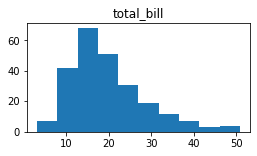

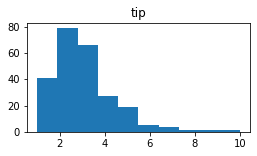

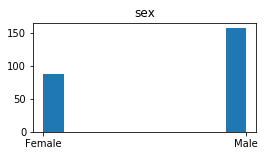

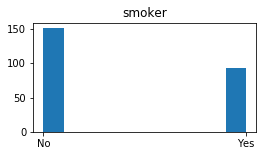

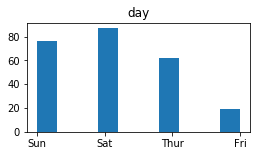

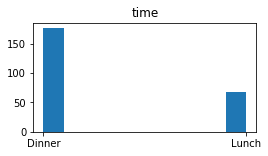

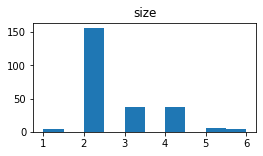

In [3]:
for col in df.columns:
    plt.figure(figsize=(4,2))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [4]:
df['sex'].replace({'male': 1, 'female': 0}, inplace=True)
df


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


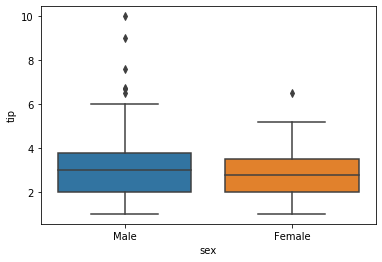

In [7]:
sns.boxplot(df.sex, df.tip)

In [8]:
# Pearson R test for 1 continuous variable.

corr, p = stats.pearsonr(df.total_bill, df.tip)
corr, p

(0.6757341092113645, 6.692470646863477e-34)

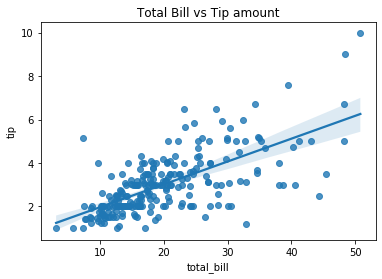

In [13]:
plt.title("Total Bill vs Tip amount")
sns.regplot(x="total_bill", y="tip", data=df)
plt.show()

# ONE TAILED T-TEST

- null_hypothesis = "Friday tips are the same as the rest of the week."
- alternative_hypothesis = "Friday tips are different than the rest of the week" 


In [17]:
alpha = 0.01

friday = df[df.day == "Fri"]

t, p = stats.ttest_1samp(friday.tip, df.tip.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = -1.127
p = 0.275


In [27]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null")

We fail to reject the null


#  TWO TAILED T-TEST

- null_hypothesis = "Smoking tables and non-smoking tables tip the same amount"
- alternative_hypothesis = "Smoking tables and non-smoking tables tip a different amount"


In [23]:
alpha = 0.01 # we want to be 99% sure our results aren't the result of chance/randomness
smoking = df[df.smoker == "Yes"]
non_smoking = df[df.smoker == "No"]

t, p = stats.ttest_ind(smoking.tip, non_smoking.tip)
p

0.9265931522244976

In [26]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


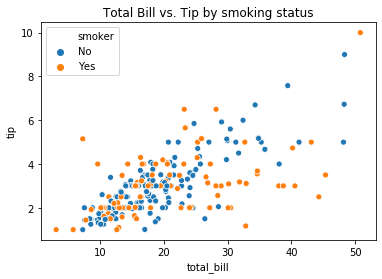

In [35]:
import seaborn as sns
plt.title("Total Bill vs. Tip by smoking status")
sns.scatterplot(x="total_bill", y="tip", data=df, hue="smoker")
plt.show()

# CHI SQUARED
- null_hypothesis = "There is no dependence between smoking status and time of day (Lunch or Dinner)"
- alternative_hypothesis = "There is a dependence between time of day (lunch/dinner) and smoking status"
- alpha = 0.01 # we want to be 99% sure that the evidence we see is not due to chance

In [32]:
alpha=.01
observed = pd.crosstab(df.time, df.smoker)

In [33]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.4771485672079724

In [34]:
if p < alpha:
    print("We reject the null that", null_hypothesis)
else:
    print("We fail to reject the null")

We fail to reject the null


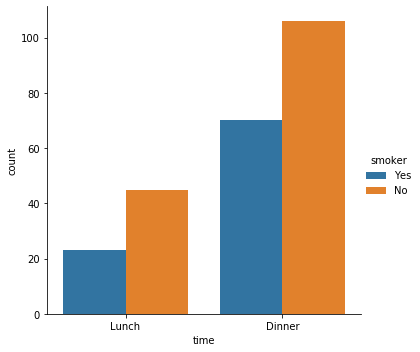

In [36]:
sns.catplot(x="time", hue="smoker", kind="count", data=df)

In [37]:
print(df[df.time == "Dinner"].smoker.value_counts())
print("The ratio of smokers to non-smokers at Dinner is", 70/176)

No     106
Yes     70
Name: smoker, dtype: int64
The ratio of smokers to non-smokers at Dinner is 0.3977272727272727


In [38]:
print(df[df.time == "Lunch"].smoker.value_counts()) # so 23 / (23 + 45)
print("The ratio of smokers to non-smokers at Dinner is", 23 / (23 + 45))

No     45
Yes    23
Name: smoker, dtype: int64
The ratio of smokers to non-smokers at Dinner is 0.3382352941176471


In [39]:
# Let's check if smoking status is independent of which day of the week
null_hypothesis = "Smoking status and day of the week are independent. There's no dependence/relationship"
alternative_hypothesis = "Smoking status and day of the week are dependent"

In [40]:
observed = pd.crosstab(df.day, df.smoker)

In [41]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

1.0567572499836523e-05

In [42]:
if p < alpha:
    print("We reject the null that", null_hypothesis)
else:
    print("We fail to reject the null")

We reject the null that Smoking status and day of the week are independent. There's no dependence/relationship


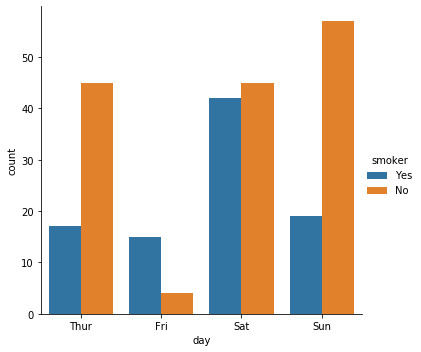

In [43]:
sns.catplot(x="day", hue="smoker", kind="count", data=df)

# ANOVA continuous variable to more than 2 categorical values

In [44]:
null_hypothesis = "Average Tip amounts are the same across days of the week"
alternative_hypothesis = "Average tips are different on different days of the week"
alpha = 0.01 # Let's be 99% certain the result we see isn't due to chance/randomness

In [45]:
# Let's isolate out the tips by day
thursday_tips = df[df.day == "Thur"].tip
friday_tips = df[df.day == "Fri"].tip
saturday_tips = df[df.day == "Sat"].tip
sunday_tips = df[df.day == "Sun"].tip

In [46]:
# f_oneway is our ANOVA test
# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html for more info
from scipy.stats import f_oneway

f, p = f_oneway(thursday_tips, friday_tips, saturday_tips, sunday_tips)
p

0.1735885553040592

In [47]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


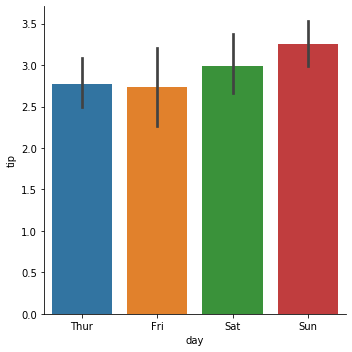

In [48]:
sns.catplot(x="day", y="tip", kind="bar", data=df)